In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import re

# set the graphs to show in the jupyter notebook
%matplotlib inline

# set seabor graphs to a better style
sns.set(style="ticks")

## Importing Data

In [2]:
sales = pd.read_csv('D:/AnalytixLab/00 - Assignment & Case Studies/02 - Data Science Using Python(DSP)/Python foundation Assignments & Case studies/3. Python Foundation Case Studies/Case Study 4 - Python Visualizations Case Study/SalesData.csv')

### 1. Compare Sales by region for 2016 with 2015 using bar chart

In [3]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [4]:
Sales_15_16 = sales.groupby(['Region'])[['Sales2015','Sales2016']].sum()

In [5]:
Sales_15_16

,Sales2015,Sales2016
Region,,
Central,7891728.86,9787808.73
East,9512916.49,12667230.45
West,5349744.64,7209689.43


<Figure size 1080x720 with 0 Axes>

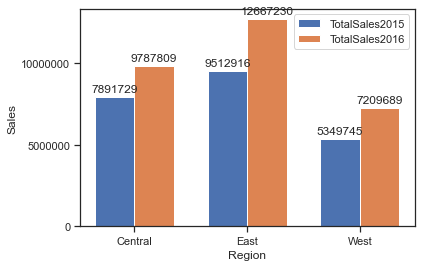

In [6]:
Region = ['Central','East','West']
indx = np.arange(len(Region))
sales_label = np.arange(0,14000000,5000000)

Sales_2015 = list(Sales_15_16['Sales2015'])
Sales_2016 = list(Sales_15_16['Sales2016'])

bar_width = 0.35
fig = plt.figure(figsize=(15,10))
fig,ax = plt.subplots()
bar2015 = ax.bar(indx - bar_width/2,Sales_2015,bar_width, label='TotalSales2015')
bar2016 = ax.bar(indx + bar_width/2,Sales_2016,bar_width, label='TotalSales2016')

ax.set_xticks(indx)
ax.set_xticklabels(Region)
ax.set_yticks(sales_label)
ax.set_yticklabels(sales_label)
ax.legend()

plt.xlabel('Region')
plt.ylabel('Sales')

for i in indx:
    ax.annotate('{0:.0f}'.format(bar2015[i].get_height()),
                xy=(bar2015[i].get_x()+bar2015[i].get_width()/2,bar2015[i].get_height()),
                xytext=(0,3),textcoords='offset points',ha='center',va='bottom')
    
for i in indx:
    ax.annotate('{0:.0f}'.format(bar2016[i].get_height()),
                xy=(bar2016[i].get_x()+bar2016[i].get_width()/2,bar2016[i].get_height()),
                xytext=(0,3),textcoords='offset points',ha='center',va='bottom')

plt.show()  

### 2. What are the contributing factors to the sales for each region in 2016. Visualize it using a Pie Chart.

In [7]:
sales_pie = sales.groupby("Region")[["Sales2016"]].sum()

In [8]:
sales_pie

,Sales2016
Region,
Central,9787808.73
East,12667230.45
West,7209689.43


Text(0, 0.5, '')

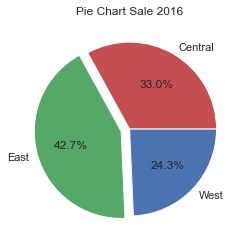

In [9]:
sales_pie.plot(kind='pie',autopct="%0.1f%%",subplots=True,explode=[0.0,0.1,0.0],legend=False,colors=['r', 'g', 'b'])

plt.title("Pie Chart Sale 2016")
plt.ylabel('')

### 3. Compare the total sales of 2015 and 2016 with respect to Region and Tiers

In [10]:
sales_region_tier = sales.groupby(["Region","Tier"])[['Sales2015','Sales2016']].sum()

In [11]:
sales_region_tier

Sales2015  Sales2016
Region  Tier                      
Central High 4798698.43 6026042.94
        Low   943439.67 1132832.85
        Med  2068225.87 2632181.47
        Out    81364.89   -3248.53
East    High 6102946.12 7817151.10
        Low   901665.80 1144929.59
        Med  2470998.02 3705149.76
        Out    37306.55       0.00
West    High 2944789.26 3768038.35
        Low   671064.38 1099502.18
        Med  1718475.92 2342148.90
        Out    15415.08       0.00

<AxesSubplot:xlabel='Region,Tier'>

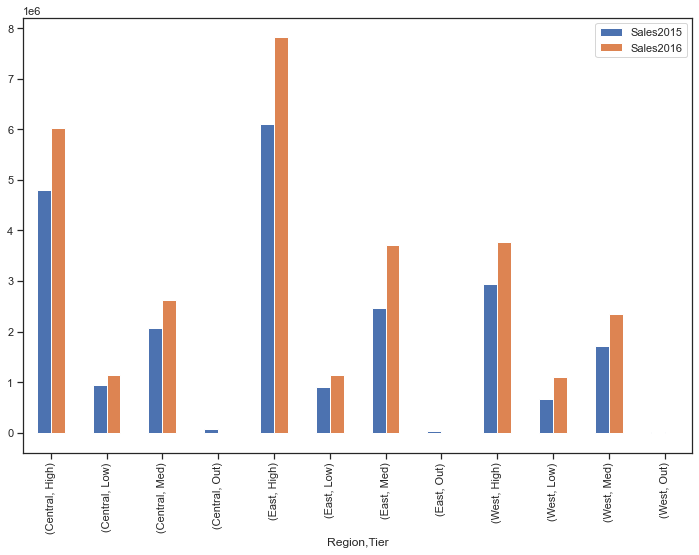

In [12]:
sales_region_tier.plot(kind='bar',figsize=(12,8))

### 4. In East region, which state registered a decline in 2016 as compared to 2015?

In [13]:
sales_state = sales.groupby(['Region',"State"])[['Sales2015','Sales2016']].sum()

In [14]:
sales_east = sales_state.loc['East']

In [15]:
sales_east

,Sales2015,Sales2016
State,,
CT,197202.79,323502.31
DC,216723.95,257421.69
FL,1660162.00,2508232.28
GA,681546.46,946919.77
MA,419278.75,687096.45
MD,527309.06,750008.79
ME,77425.64,183673.05
NC,1292801.64,1610521.00
NH,136419.38,144717.51


Text(0, 0.5, 'Sales')

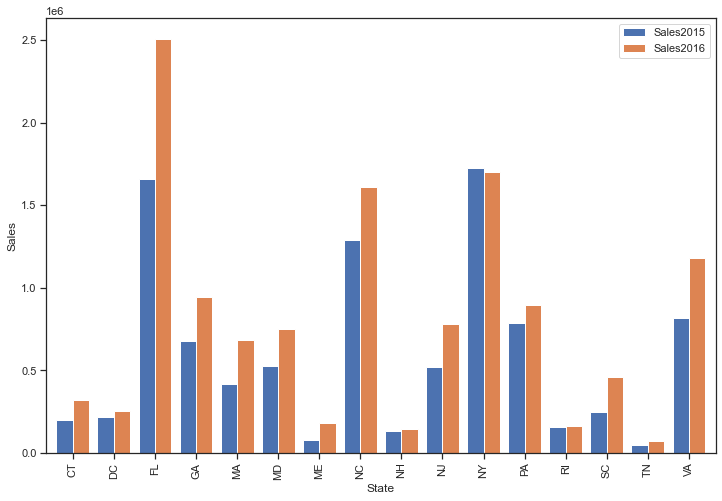

In [16]:
sales_east.plot(kind="bar",figsize=(12,8),width=0.8)
plt.xlabel("State")
plt.ylabel("Sales")

### 5. In all the High tier, which Division saw a decline in number of units sold in 2016 compared to 2015?

In [17]:
sales_division_tier = sales.groupby(["Tier","Division"])[["Units2015","Units2016"]].sum()

In [18]:
high_tier = sales_division_tier.loc["High"]

In [19]:
high_tier

,Units2015,Units2016
Division,,
BIG APPLE,180.83,231.00
CHARGERS,123.67,164.50
CONGRESSIONAL,164.50,205.00
DIAMONDBACK,153.33,176.67
EMPIRE,414.33,449.33
GRIDIRON,213.67,246.17
GULF STREAM,185.00,301.00
HAILSTORM,187.83,247.00
KINETIC,214.33,244.50


Text(0, 0.5, 'Units')

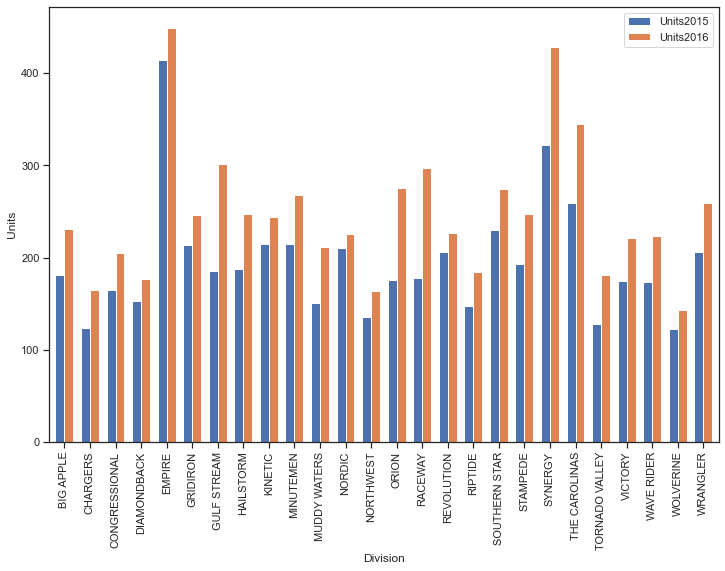

In [20]:
high_tier.plot(kind="bar",figsize=(12,8),width=0.7)
plt.ylabel('Units')

### 6. Create a new column Qtr using numpy.where() or any suitable utility in the imported

**<br/>
dataset. The Quarters are based on months and defined as -
<br/>
• Jan - Mar : Q1
<br/>
• Apr - Jun : Q2
<br/>
• Jul - Sep : Q3
<br/>
• Oct - Dec : Q4**

In [21]:
sales["Qtr"] = np.where(((sales.Month =="Jan")|(sales.Month == "Feb")|(sales.Month == "Mar")),'Q1',
                        np.where(((sales.Month =="Apr")|(sales.Month == "May")|(sales.Month == "Jun")),'Q2',
                                 np.where(((sales.Month =="Jul")|(sales.Month == "Aug")|(sales.Month == "Sep")),'Q3','Q4')))

### 7. Compare Qtr wise sales in 2015 and 2016 in a bar plot

In [22]:
qtr_sales = sales.groupby(["Qtr"])[["Sales2015","Sales2016"]].sum()

In [23]:
qtr_sales

,Sales2015,Sales2016
Qtr,,
Q1,5485800.16,6997953.24
Q2,5390862.08,7237361.17
Q3,6164093.84,7861546.02
Q4,5713633.91,7567868.17


Text(0, 0.5, 'Sales')

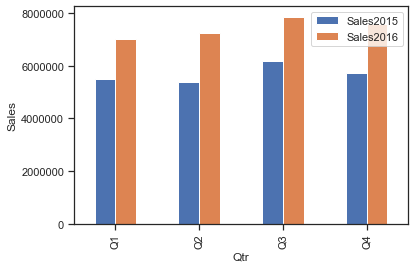

In [24]:
sales_label = np.arange(0,10000000,2000000)

ax = qtr_sales.plot(kind="bar")
ax.set_yticks(sales_label)
ax.set_yticklabels(sales_label)

plt.ylabel("Sales")

### 8. Determine the composition of Qtr wise sales in and 2016 with regards to all the Tiers in a pie chart.
 **(Draw 4 pie charts representing a Quarter for each Tier)**

In [25]:
qtr_tiers = sales.pivot_table(index='Qtr',columns='Tier',values='Sales2016')

In [26]:
qtr_tiers

Tier,High,Low,Med,Out
Qtr,,,,
Q1,7974.68,5516.47,7654.04,0.00
Q2,8752.02,5031.61,8758.16,0.00
Q3,9334.40,5446.42,8197.98,-360.95
Q4,9386.14,5052.10,8307.60,0.00


In [27]:
qtr_tiers['Out'] = qtr_tiers['Out'].abs()

In [28]:
qtr_tiers

Tier,High,Low,Med,Out
Qtr,,,,
Q1,7974.68,5516.47,7654.04,0.00
Q2,8752.02,5031.61,8758.16,0.00
Q3,9334.40,5446.42,8197.98,360.95
Q4,9386.14,5052.10,8307.60,0.00


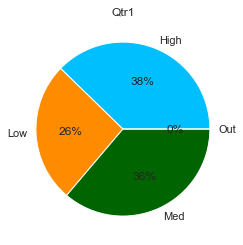

In [29]:
plt.pie(x=qtr_tiers.loc["Q1",:],autopct="%1.0f%%",labels=["High","Low","Med","Out"],colors=['deepskyblue', 'darkorange', 'darkgreen'])
plt.title('Qtr1')
plt.show()

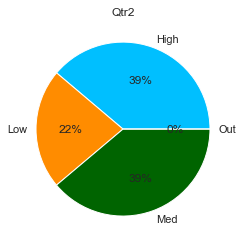

In [30]:
plt.pie(x=qtr_tiers.loc["Q2",:],autopct="%1.0f%%",labels=["High","Low","Med","Out"],colors=['deepskyblue', 'darkorange', 'darkgreen'])
plt.title('Qtr2')
plt.show()

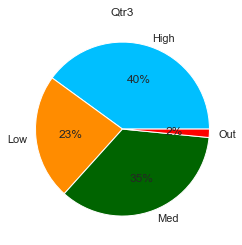

In [31]:
plt.pie(x=qtr_tiers.loc["Q3",:],autopct="%1.0f%%",labels=["High","Low","Med","Out"],colors=['deepskyblue', 'darkorange', 'darkgreen','red'])
plt.title('Qtr3')
plt.show()

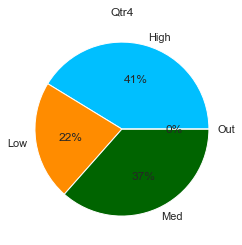

In [32]:
plt.pie(x=qtr_tiers.loc["Q4",:],autopct="%1.0f%%",labels=["High","Low","Med","Out"],colors=['deepskyblue', 'darkorange', 'darkgreen'])
plt.title('Qtr4')
plt.show()